In [1]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
grid = pd.read_csv('Data_for_UCI_named.csv')

grid = grid.drop('stab', axis=1)
grid.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [4]:
grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stabf   10000 non-null  object 
dtypes: float64(12), object(1)
memory usage: 1015.8+ KB


In [5]:
grid.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930


In [6]:
grid.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stabf    0
dtype: int64

In [7]:
X = grid.drop('stabf', axis=1)
y = grid.stabf

In [8]:
y.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = encoder.transform(y)

In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain_norm = pd.DataFrame(scaler.fit_transform(Xtrain), columns=Xtrain.columns)
Xtest_norm = pd.DataFrame(scaler.fit_transform(Xtest), columns=Xtest.columns)
ytrain = ytrain.reshape(-1,1)
ytrain_norm = scaler.fit_transform(ytrain)

In [20]:
ytrain_norm = ytrain_norm.ravel()
ytrain = ytrain.ravel()

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [34]:
dom_class = RandomForestClassifier(random_state=1)
dom_class.fit(Xtrain_norm, ytrain_norm)

RandomForestClassifier(random_state=1)

In [35]:
dom_predict = dom_class.predict(Xtest_norm)
print(classification_report(ytest, dom_predict1))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       712
           1       0.93      0.96      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [36]:
print(confusion_matrix(ytest, dom_predict))

[[ 624   88]
 [  55 1233]]


In [47]:
print(dom_class.score(Xtest_norm,ytest))

0.9285


In [29]:
xgb = XGBClassifier(random_state=1)
xgb.fit(Xtrain_norm, ytrain_norm)

XGBClassifier(random_state=1)

In [37]:
xgb_predict = xgb.predict(Xtest_norm)
print(classification_report(ytest, xgb_predict))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       712
           1       0.92      0.96      0.94      1288

    accuracy                           0.92      2000
   macro avg       0.92      0.90      0.91      2000
weighted avg       0.92      0.92      0.92      2000



In [38]:
print(confusion_matrix(ytest, xgb_predict))

[[ 602  110]
 [  52 1236]]


In [49]:
print(xgb.score(Xtest_norm,ytest))

0.919


In [39]:
lgb = LGBMClassifier(random_state=1)
lgb.fit(Xtrain_norm, ytrain_norm)

LGBMClassifier(random_state=1)

In [43]:
lgb_predict = lgb.predict(Xtest_norm)
print(classification_report(ytest, lgb_predict))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       712
           1       0.95      0.97      0.96      1288

    accuracy                           0.94      2000
   macro avg       0.94      0.93      0.94      2000
weighted avg       0.94      0.94      0.94      2000



In [44]:
print(confusion_matrix(ytest, lgb_predict))

[[ 643   69]
 [  45 1243]]


In [50]:
print(lgb.score(Xtest_norm,ytest))

0.943


In [70]:
tree = {'n_estimators': [1000,300,100,500],
        'min_samples_split': [2,5,7,2],
        'min_samples_leaf': [8,6,4,8],
        'max_features': [None, 'auto', None,'log2']}

In [71]:
rs_cv = RandomizedSearchCV(ExtraTreesClassifier(), 
                           param_distributions=tree, 
                           cv=5, n_iter=10, scoring = 'accuracy',
                           n_jobs = -1, verbose = 1, random_state = 1)

rs_cv.fit(Xtrain_norm, ytrain_norm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'max_features': [None, 'auto', None,
                                                         'log2'],
                                        'min_samples_leaf': [8, 6, 4, 8],
                                        'min_samples_split': [2, 5, 7, 2],
                                        'n_estimators': [1000, 300, 100, 500]},
                   random_state=1, scoring='accuracy', verbose=1)

In [72]:
rs_cv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': None}

In [74]:
rs_cv.score(Xtest_norm, ytest)

0.9305

In [83]:
ex_tree = ExtraTreesClassifier(n_estimators= 1000,
                                min_samples_split= 2,
                                min_samples_leaf=4,
                                max_features=None, 
                               random_state=1)

ex_tree.fit(Xtrain_norm, ytrain_norm)

ExtraTreesClassifier(max_features=None, min_samples_leaf=4, n_estimators=1000,
                     random_state=1)

In [84]:
ex_tree.score(Xtest_norm, ytest)

0.9315

In [86]:
ex_tree.feature_importances_

array([0.13257336, 0.13540754, 0.13046953, 0.13045802, 0.00829261,
       0.01079156, 0.01084933, 0.01029145, 0.1029204 , 0.10764198,
       0.11164819, 0.10865604])

In [87]:
feat_importance = dict(zip(grid.columns, list(ex_tree.feature_importances_)))
feat_importance

{'tau1': 0.13257335794234443,
 'tau2': 0.13540754222855939,
 'tau3': 0.13046952809672405,
 'tau4': 0.13045802144005372,
 'p1': 0.008292608924513604,
 'p2': 0.010791562420879561,
 'p3': 0.010849327934057448,
 'p4': 0.01029144697314551,
 'g1': 0.10292040071967157,
 'g2': 0.10764197645739788,
 'g3': 0.11164818694013166,
 'g4': 0.1086560399225213}

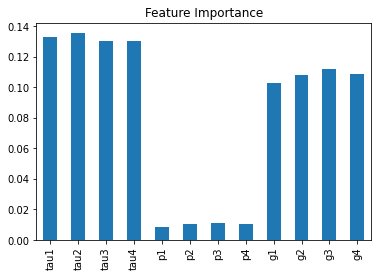

In [90]:
feat_grid = pd.DataFrame(feat_importance, index=[0])
feat_grid.T.plot.bar(title ='Feature Importance', legend= False)